| **방법**                   | **계산 요소**             | **특징**                                         | **표본 크기**       | **극단값 민감도** | **주요 사용 사례**                       |
|----------------------------|---------------------------|-------------------------------------------------|---------------------|-------------------|-------------------------------------------|
| **Shapiro-Wilk Test**      | 데이터 순위               | 소표본에 적합, 가장 정밀한 방법 중 하나         | 5~5,000             | 중간              | 소표본 데이터에서 정규성 확인             |
| **Kolmogorov-Smirnov Test**| 누적 분포 함수(CDF) 비교 | 특정 분포와의 차이를 평가, 단순하지만 덜 정밀   | 제한 없음           | 낮음              | 특정 분포(정규 분포 등)와 비교            |
| **Anderson-Darling Test**  | CDF 및 극단값             | 극단값에 민감, 특정 유의 수준에서 임계값 제공  | 제한 없음           | 높음              | 극단값이 중요한 데이터에서 정규성 확인    |
| **Jarque-Bera Test**       | 왜도와 첨도 직접 계산     | 왜도와 첨도를 단순 결합, 대규모 데이터에 적합  | 대표본 이상 추천    | 낮음              | 대규모 데이터의 왜도와 첨도 평가          |
| **D'Agostino-Pearson Test**| 왜도와 첨도 Z-점수로 변환 | 왜도와 첨도를 독립적으로 표준화, 정밀도 높음   | 50 이상 추천        | 높음              | 중간 크기 데이터의 정규성 확인            |

* 소표본: Shapiro-Wilk이 가장 적합.
* 특정 분포와 비교: Kolmogorov-Smirnov 사용.
* 극단값 민감도: Anderson-Darling이 강점.
* 대규모 데이터: Jarque-Bera 적합.
* 중간 크기 데이터: D'Agostino-Pearson 추천.

In [24]:
import numpy as np
from scipy.stats import shapiro, normaltest, anderson, kstest, norm, jarque_bera
import json
import glob
# result = anderson(data)
# print("\nAnderson-Darling Test:")
# print(f"Statistic: {result.statistic:.4f}")
# for i in range(len(result.critical_values)):
#     sl, cv = result.significance_level[i], result.critical_values[i]
#     if result.statistic < cv:
#         print(f"Significance Level {sl}%: Critical Value={cv:.4f} (정규성을 따름)")
#     else:
#         print(f"Significance Level {sl}%: Critical Value={cv:.4f} (정규성을 따르지 않음)")


In [25]:
# wdata = np.load('/home/jgryu/Weight_compression/Wparam_dataset/npy/meta-llama-3-8b_mlp_size-128-1024_train.npy')


dataset_path = '/home/jgryu/Weight_compression/Wparam_dataset/model_param_tensor/meta-llama/Meta-Llama-3-8B'
tenosr_path_list = glob.glob(f'{dataset_path}/**/*.npy', recursive=True)

w_list = []
for path in tenosr_path_list:
    w = np.load(path)
    w_list.append(w)



KeyboardInterrupt: 

In [ ]:
len(w_list)

291

In [ ]:
# with open('/home/jgryu/Weight_compression/Wparam_dataset/path_json/meta-llama-3-8b_attn_train.json', 'r', encoding='utf-8') as file:
#     data = json.load(file)  # JSON 파일을 Python 객체로 변환

# print(data)  # 읽어온 데이터 출력
# wdata = np.load(data[0])

In [ ]:
# wdata = wdata.T
data = wdata.reshape((-1, 1024))
print(data.shape)

print(f"Shapiro-Wilk Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    stat, p = shapiro(col_data)
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print(f"Kolmogorov-Smirnov Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    stat, p_value = kstest(col_data, 'norm', args=(norm.fit(col_data)))
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print("Anderson-Darling Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    result = anderson(col_data)
    if result.statistic > result.critical_values[2]:  # 유의 수준 5% 기준
        # print("정규성이 없다 (H0 기각)")
        pass
    else:
        # print("정규성을 따른다 (H0 채택)")
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print("Jarque-Bera Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    stat, p_value = jarque_bera(col_data)
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')

print("D'Agostino and Pearson’s Test")
normal_ch = []
for i in range(data.shape[1]):
    col_data = data[:, i]
    tat, p_value = normaltest(col_data)
    if p > 0.05:
        normal_ch.append(i)
print(f'normal ch: {len(normal_ch)}/{data.shape[1]}')



NameError: name 'wdata' is not defined

라마3 8b Mlp train set 전체
(4358144, 1024)
Shapiro-Wilk Test
/home/jgryu/miniconda3/envs/Wcomp/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
normal ch: 280/1024
Kolmogorov-Smirnov Test
normal ch: 1024/1024
Anderson-Darling Test
normal ch: 0/1024
Jarque-Bera Test
normal ch: 1024/1024
D'Agostino and Pearson’s Test
normal ch: 1024/1024

In [ ]:
from scipy.stats import skew, kurtosis

# 예제 데이터
data = wdata.flatten()
print(data.shape)
# 왜도 계산
skewness = skew(data)

# 첨도 계산
kurt = kurtosis(data, fisher=True)  # Fisher=True로 설정하면 정규 분포 기준 (첨도=0)

print("왜도 (Skewness):", skewness)
print("첨도 (Kurtosis):", kurt)

# 왜도와 첨도 해석
if abs(skewness) < 0.5:
    print("데이터는 대칭에 가깝다.")
elif skewness > 0.5:
    print("데이터는 오른쪽으로 치우쳐 있다. (positive skewness)")
else:
    print("데이터는 왼쪽으로 치우쳐 있다. (negative skewness)")

if kurt > 0:
    print("데이터는 뾰족한 분포이다. (leptokurtic)")
elif kurt < 0:
    print("데이터는 평평한 분포이다. (platykurtic)")
else:
    print("데이터는 정규 분포와 유사한 첨도를 가진다. (mesokurtic)")


NameError: name 'wdata' is not defined

라마3 8b Mlp train set 전체
(4462739456,)
왜도 (Skewness): -0.0010288283212816656
첨도 (Kurtosis): 1.1470814277876675
데이터는 대칭에 가깝다.
데이터는 뾰족한 분포이다. (leptokurtic)

In [ ]:
import numpy as np
import os
dtype = np.float32

import torch
import torchvision
# import tqdm
import os

from transformers import CLIPVisionModelWithProjection, ViTForImageClassification, AutoModelForCausalLM
from transformers import AutoModel, AutoTokenizer
import numpy

from huggingface_hub import try_to_load_from_cache, _CACHED_NO_EXIST
from huggingface_hub import scan_cache_dir
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

def get_ckpt_path(path, branch = 'main'):
    if not os.path.isdir(os.path.join(path, 'snapshots')):
        return None
    branch_file =  os.path.join(path, 'refs', branch)
    with open(branch_file, 'r', encoding='utf-8') as file:
        revision = file.read()
    return os.path.join(path, 'snapshots', revision)



Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


Loading checkpoint shards: 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.10.self_attn.q_proj.weight  ###
###  model.layers.11.self_attn.q_proj.weight  ###
###  model.layers.12.self_attn.q_proj.weight  ###
###  model.layers.13.self_attn.q_proj.weight  ###
###  model.layers.14.self_attn.q_proj.weight  ###
###  model.layers.15.self_attn.q_proj.weight  ###
###  model.layers.16.self_attn.q_proj.weight  ###
###  model.layers.17.self_attn.q_proj.weight  ###
###  model.layers.18.self_attn.q_proj.weight  ###
###  model.layers.19.self_attn.q_proj.weight  ###
###  model

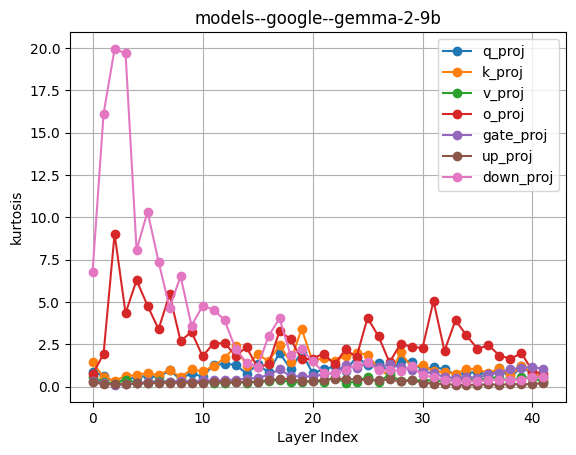

Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.10.self_attn.q_proj.weight  ###
###  model.layers.11.self_attn.q_proj.weight  ###
###  model.layers.12.self_attn.q_proj.weight  ###
###  model.layers.13.self_attn.q_proj.weight  ###
###  model.layers.14.self_attn.q_proj.weight  ###
###  model.layers.15.self_attn.q_proj.weight  ###
###  model.layers.16.self_attn.q_proj.weight  ###
###  model.layers.17.self_attn.q_proj.weight  ###
###  model.layers.18.self_attn.q_proj.weight  ###
###  model.layers.19.self_attn.q_proj.weight  ###
###  model

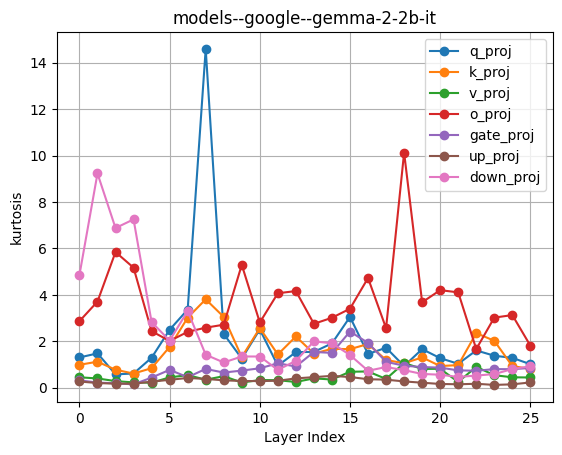

Loading checkpoint shards: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.0.self_attn.q_proj.bias  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.bias  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.bias  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.bias  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.bias  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.bias  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.bias  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.bias  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.bias  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.bias  ###
###  model.layers.10.self_attn.q_proj.we

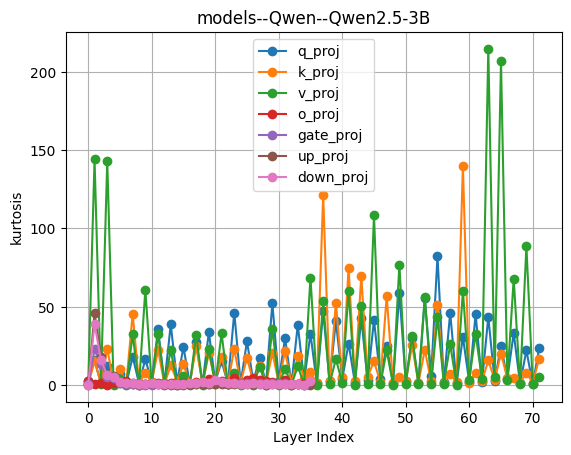

Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


###  model.layers.0.self_attn.q_proj.weight  ###
###  model.layers.0.self_attn.q_proj.bias  ###
###  model.layers.1.self_attn.q_proj.weight  ###
###  model.layers.1.self_attn.q_proj.bias  ###
###  model.layers.2.self_attn.q_proj.weight  ###
###  model.layers.2.self_attn.q_proj.bias  ###
###  model.layers.3.self_attn.q_proj.weight  ###
###  model.layers.3.self_attn.q_proj.bias  ###
###  model.layers.4.self_attn.q_proj.weight  ###
###  model.layers.4.self_attn.q_proj.bias  ###
###  model.layers.5.self_attn.q_proj.weight  ###
###  model.layers.5.self_attn.q_proj.bias  ###
###  model.layers.6.self_attn.q_proj.weight  ###
###  model.layers.6.self_attn.q_proj.bias  ###
###  model.layers.7.self_attn.q_proj.weight  ###
###  model.layers.7.self_attn.q_proj.bias  ###
###  model.layers.8.self_attn.q_proj.weight  ###
###  model.layers.8.self_attn.q_proj.bias  ###
###  model.layers.9.self_attn.q_proj.weight  ###
###  model.layers.9.self_attn.q_proj.bias  ###
###  model.layers.10.self_attn.q_proj.we

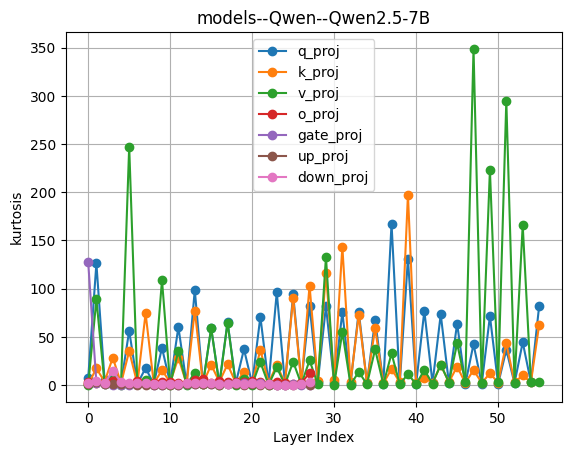

In [39]:
model_list = [
            #   '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--meta-llama--Meta-Llama-3-8B',
            #   '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--meta-llama--Llama-2-7b-hf',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--google--gemma-2-9b',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--google--gemma-2-2b-it',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--Qwen--Qwen2.5-3B',
              '/home/jgryu/Weight_compression/Wparam_dataset/model_zoo/huggingface/models--Qwen--Qwen2.5-7B'
              ]
for model_path in model_list:
    ckpt_path = get_ckpt_path(model_path)
    model = AutoModelForCausalLM.from_pretrained(ckpt_path, local_files_only=True, trust_remote_code=True)

    state_dict = model.state_dict()
    plot = {}
    idx = 0
    for wtype in ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']:
        plot[wtype] = []
        for k, v in state_dict.items():
            if wtype in k:
                data = v.flatten()
                mean = data.mean().item()
                median = data.median().item()
                min = data.min().item()
                max = data.max().item()
                kurt = kurtosis(data, fisher=True)  
                plot[wtype].append((kurt, mean, median, min, max))
                print('### ', k, ' ###')
                # print(data.shape)
                # skewness = skew(data)
                # # print("Skewness:", skewness)
                # print("Kurtosis:", kurt)
                # print("mean:", mean, "median:", median, "min:", min, "max:", max)
                

    plt.figure()
    for wtype, stats_list in plot.items():
        if not stats_list:
            continue  # 데이터가 없는 경우 건너뜀

        # 각각의 값을 분리
        kurtosis_vals = [stats[0] for stats in stats_list]
        mean_vals = [stats[1] for stats in stats_list]
        median_vals = [stats[2] for stats in stats_list]
        min_vals = [stats[3] for stats in stats_list]
        max_vals = [stats[4] for stats in stats_list]
        
        x_labels = range(len(kurtosis_vals))
        plt.plot(x_labels, kurtosis_vals, label=wtype, marker='o')
        # plt.plot(x_labels, mean_vals, label='Mean', marker='o')
        # plt.plot(x_labels, median_vals, label='Median', marker='o')
        # plt.plot(x_labels, min_vals, label='Min', marker='o')
        # plt.plot(x_labels, max_vals, label='Max', marker='o')

    plt.title(model_path.split('/')[-1])
    plt.xlabel("Layer Index")
    plt.ylabel("kurtosis")
    plt.legend()
    plt.grid(True)

    # 그래프 표시
    plt.show()

    save_path = '/home/jgryu/Weight_compression/kurtosis_per_layer'
    save_path = os.path.join(save_path, model_path.split('/')[-1] + '.json')
    with open(save_path, 'w', encoding='utf-8') as file:
        json.dump(plot, file, indent=4, ensure_ascii=False)

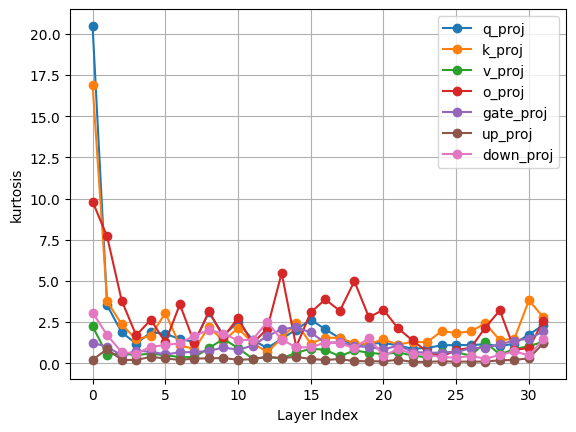

# 독립성

In [1]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

import torch
from transformers import CLIPVisionModelWithProjection, ViTForImageClassification, AutoModelForCausalLM
from transformers import AutoModel, AutoTokenizer

ckpt_path = '/home/jgryu/Weight_compression/llm-awq/model_cache/models--meta-llama--Meta-Llama-3-8B/snapshots/8cde5ca8380496c9a6cc7ef3a8b46a0372a1d920'
net = AutoModelForCausalLM.from_pretrained(ckpt_path, local_files_only=True)

mean = np.load(f'/home/jgryu/Weight_compression/Wparam_dataset/TFRecord/meta-llama--Meta-Llama-3-8B/mlp/d16/mlp_d16_train_mean.npy')
std = np.load(f'/home/jgryu/Weight_compression/Wparam_dataset/TFRecord/meta-llama--Meta-Llama-3-8B/mlp/d16/mlp_d16_train_std.npy')
mean = torch.from_numpy(mean)
std = torch.from_numpy(std)

/home/jgryu/miniconda3/envs/Wcomp/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


In [2]:
state_dict = net.state_dict()
W = []
for k, v in state_dict.items():
    if 'layers.0' in k and 'q_proj' in k:
        W.append(v.reshape(-1, 128))
    
W = torch.cat(W, dim=0)
print(W.shape)

torch.Size([131072, 128])


In [3]:
d = W.shape[-1] // 2
tensor_split = torch.split(W, d, dim=1)  # dim=1에서 64씩 나눔
X = tensor_split[0]  # 첫 번째 (-1, 64)
Y = tensor_split[1]  # 두 번째 (-1, 64)
print(X.shape, Y.shape)

torch.Size([131072, 64]) torch.Size([131072, 64])


1. Distance Correlation

In [ ]:
import dcor
import numpy as np

# 샘플 데이터 생성
np.random.seed(0)
# X = np.random.rand(1000, 50)  # 50차원 데이터
# Y = np.random.rand(1000, 50)  # 독립적인 50차원 데이터

# Distance Correlation 계산
dc = dcor.distance_correlation(X, Y)
print(f"Distance Correlation: {dc:.4f}")

# 독립 여부 판단
if dc < 1e-3:  # Threshold는 상황에 따라 조정 가능
    print("Variables are likely independent.")
else:
    print("Variables are dependent.")

2. HSIC (Hilbert-Schmidt Independence Criterion)

In [5]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

# HSIC 계산 함수
def hsic(X, Y, sigma=1.0):
    K = rbf_kernel(X, X, gamma=1 / (2 * sigma**2))  # X의 RBF 커널
    L = rbf_kernel(Y, Y, gamma=1 / (2 * sigma**2))  # Y의 RBF 커널
    n = K.shape[0]
    H = np.eye(n) - (1/n) * np.ones((n, n))
    
    # HSIC 계산
    HSIC_value = np.trace(K @ H @ L @ H) / (n - 1)**2
    return HSIC_value

# 샘플 데이터 생성
np.random.seed(0)
# X = np.random.rand(1000, 50)  # 50차원 데이터
# Y = np.random.rand(1000, 50)  # 독립적인 50차원 데이터

# HSIC 계산
X = X[:10000]
Y = Y[:10000]
hsic_value = hsic(X, Y, sigma=1.0)
print(f"HSIC Value: {hsic_value:.4f}")

# 독립 여부 판단
if hsic_value < 1e-3:  # Threshold 설정
    print("Variables are likely independent.")
else:
    print("Variables are dependent.")


HSIC Value: 0.0000
Variables are likely independent.


3. Permutation Test + Distance Correlation

In [ ]:
import dcor
import numpy as np

# 샘플 데이터 생성
np.random.seed(0)
X = np.random.rand(1000, 50)  # 50차원 데이터
Y = np.random.rand(1000, 50)  # 독립적인 50차원 데이터

# 실제 Distance Correlation 계산
dc_real = dcor.distance_correlation(X, Y)

# Permutation Test
perm_dc = []
num_permutations = 100
for _ in range(num_permutations):
    Y_perm = np.random.permutation(Y)  # Y를 무작위로 섞음
    dc_perm = dcor.distance_correlation(X, Y_perm)
    perm_dc.append(dc_perm)

# p-value 계산
p_value = (np.sum(np.array(perm_dc) >= dc_real) + 1) / (num_permutations + 1)

print(f"Real Distance Correlation: {dc_real:.4f}")
print(f"p-value: {p_value:.4f}")

# 독립 여부 판단
if p_value > 0.05:
    print("Variables are likely independent.")
else:
    print("Variables are dependent.")
